In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/wine.csv')

# Display basic information about the dataset
print("Basic Information:")
print(data.info())

# Display summary statistics for numerical features
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Summary Statistics:
             Type     Alcohol       Malic         Ash  Alcalin

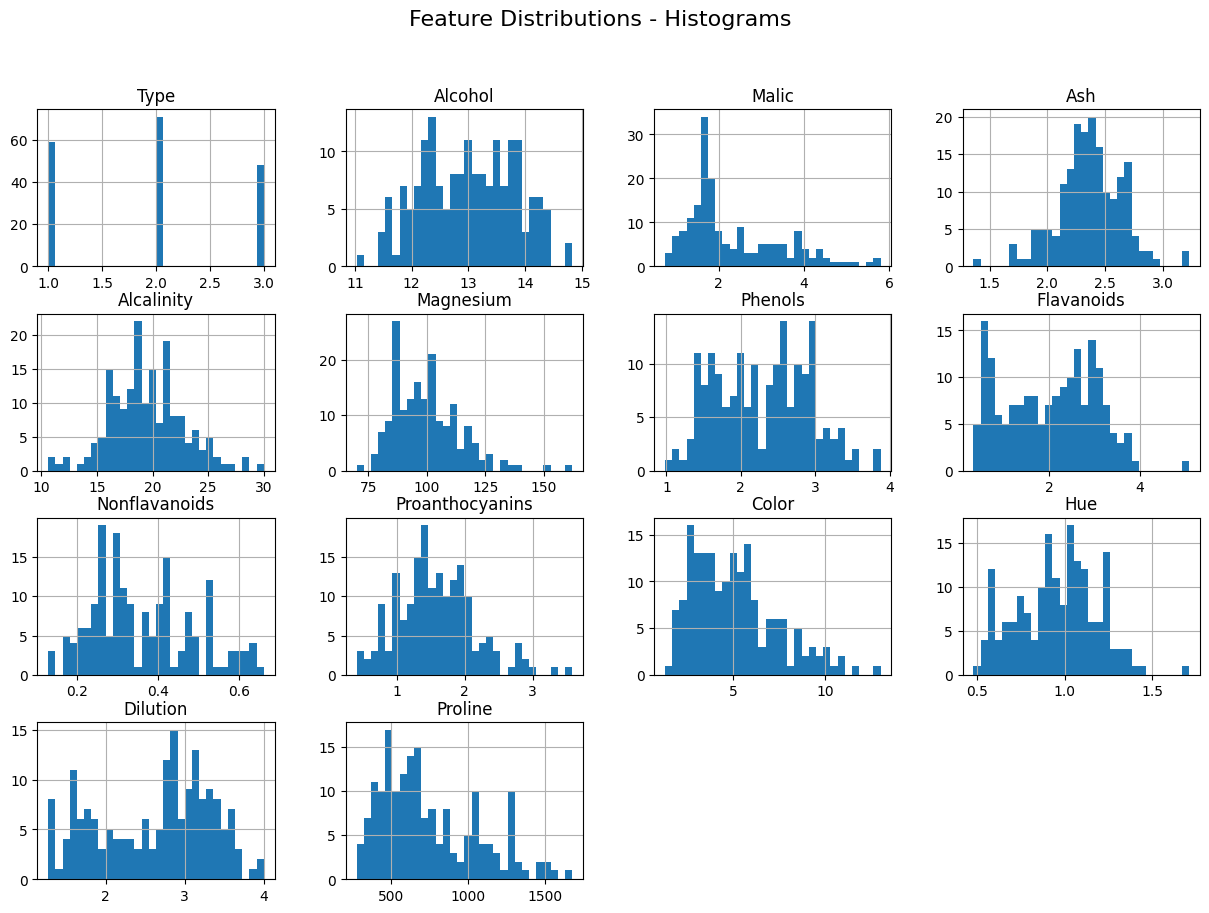

In [2]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions - Histograms", fontsize=16)
plt.show()


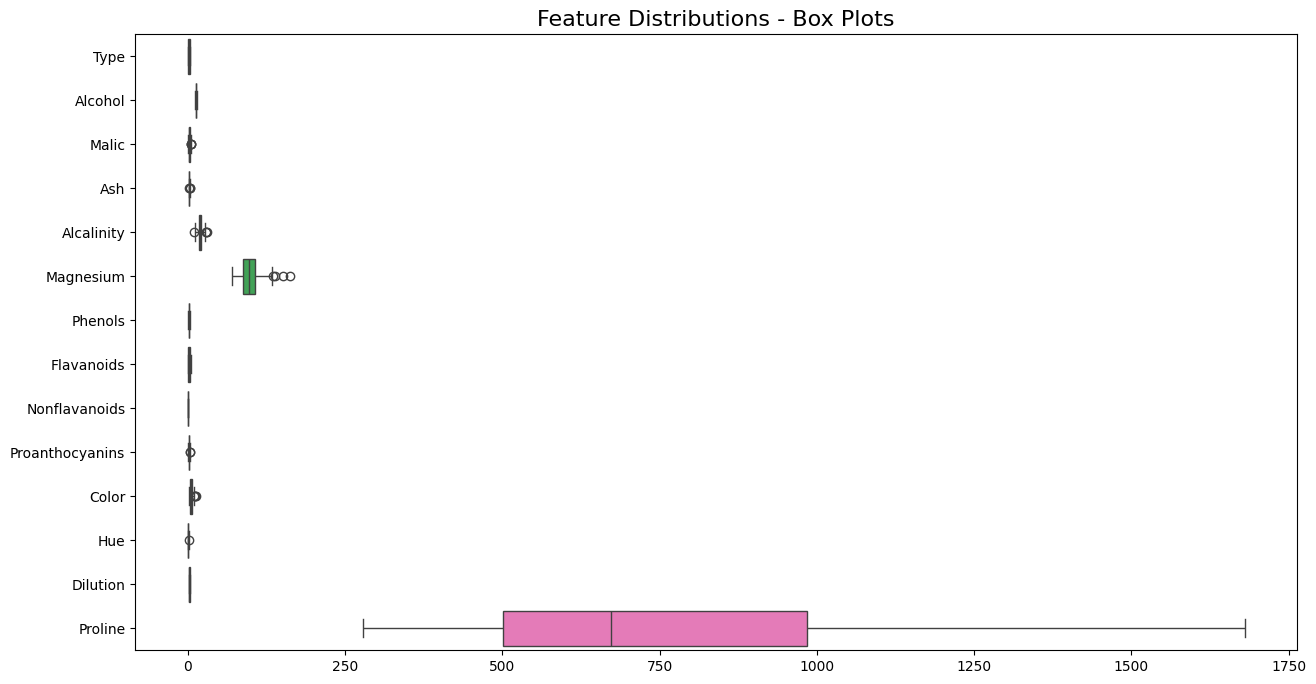

In [3]:
import seaborn as sns

# Plot box plots for each numeric column
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, orient='h')
plt.title("Feature Distributions - Box Plots", fontsize=16)
plt.show()


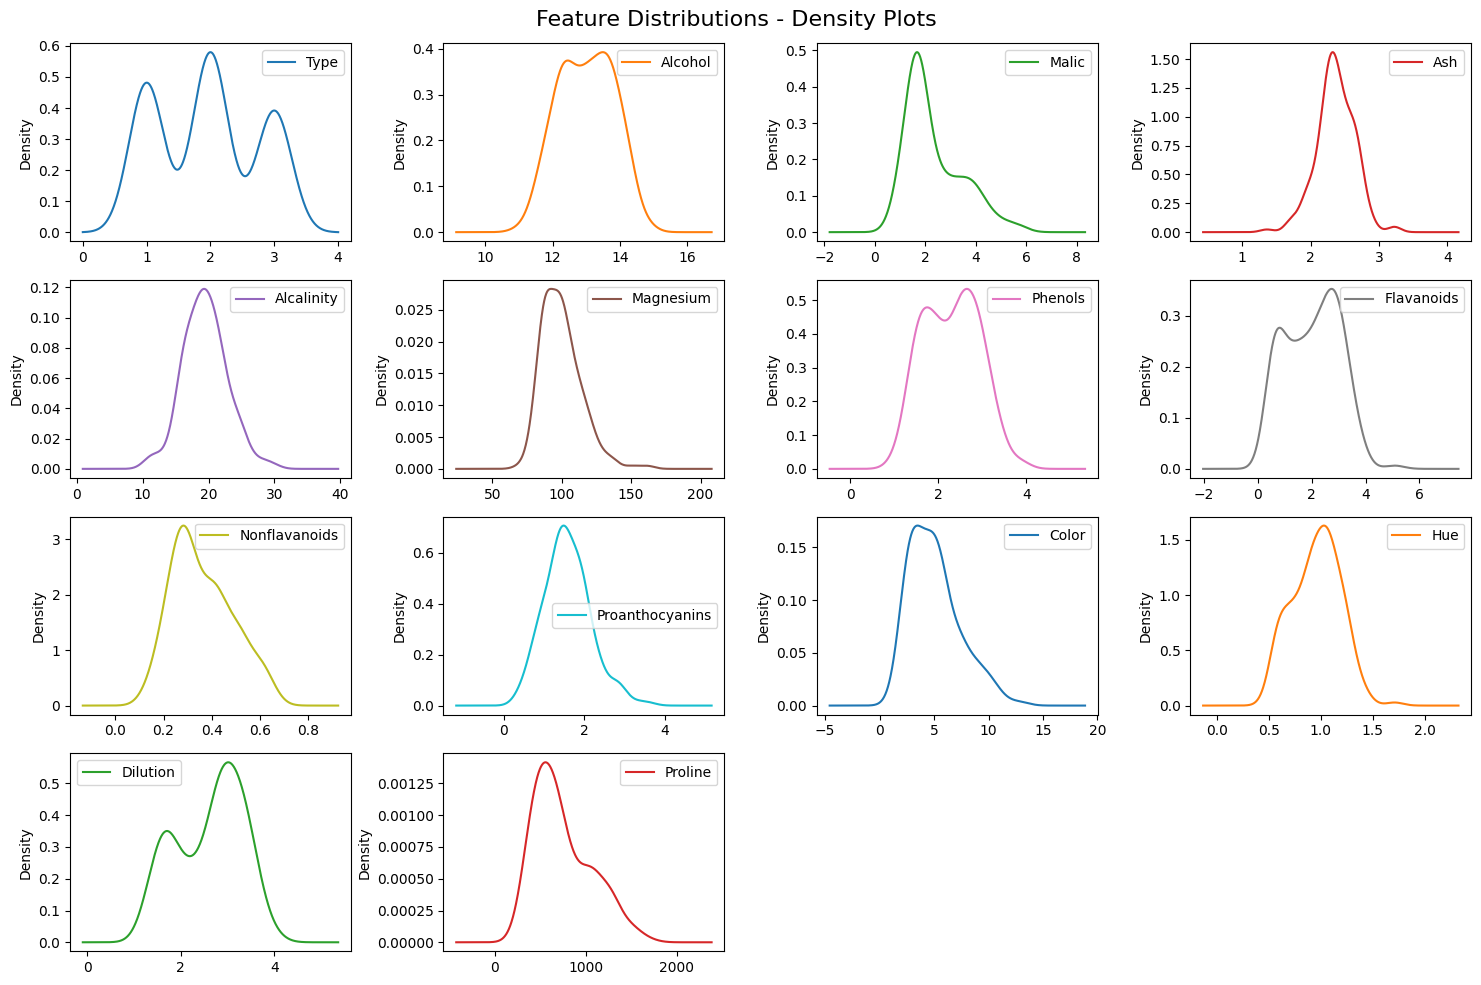

In [5]:
# Plot density plots for each numeric column
# Adjust layout to accommodate all 14 columns
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
# layout is now (4,4) to hold 16 plots which is enough for our 14 features
plt.suptitle("Feature Distributions - Density Plots", fontsize=16)
plt.tight_layout()  # Adjust subplot parameters for a tight layout to avoid overlapping
plt.show()

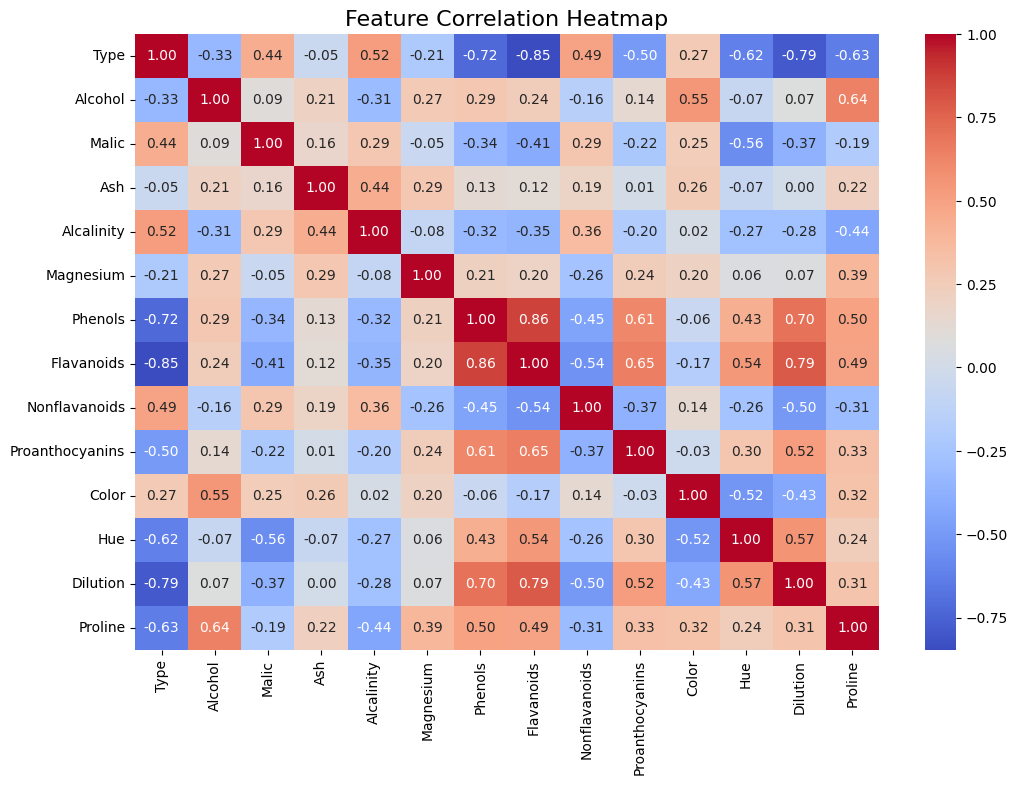

In [6]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Standardized Data Shape:", scaled_data.shape)


Standardized Data Shape: (178, 14)


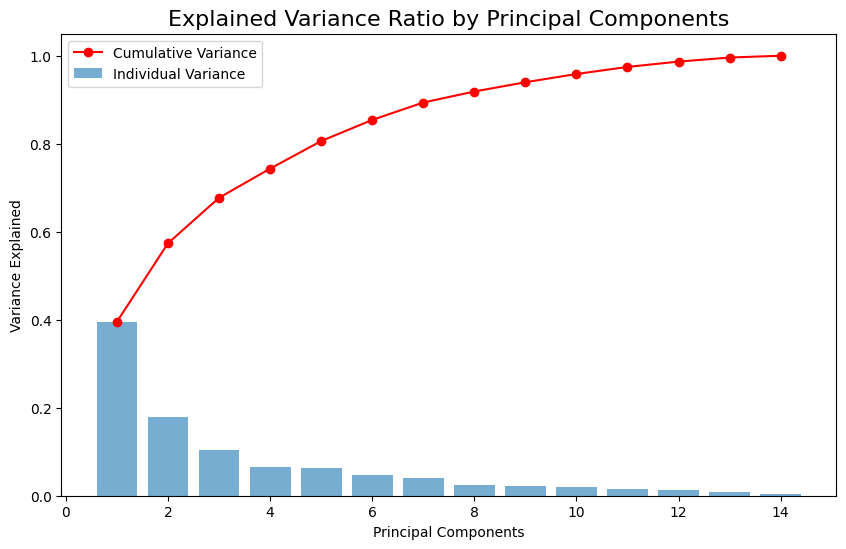

In [8]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA
pca = PCA()
pca.fit(scaled_data)

# Plot explained variance ratio (scree plot)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r', label='Cumulative Variance')
plt.title("Explained Variance Ratio by Principal Components", fontsize=16)
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.legend()
plt.show()


In [9]:
# Choose the number of components to retain (e.g., 95% of variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

print("Transformed PCA Data Shape:", pca_data.shape)


Optimal number of components: 10
Transformed PCA Data Shape: (178, 10)


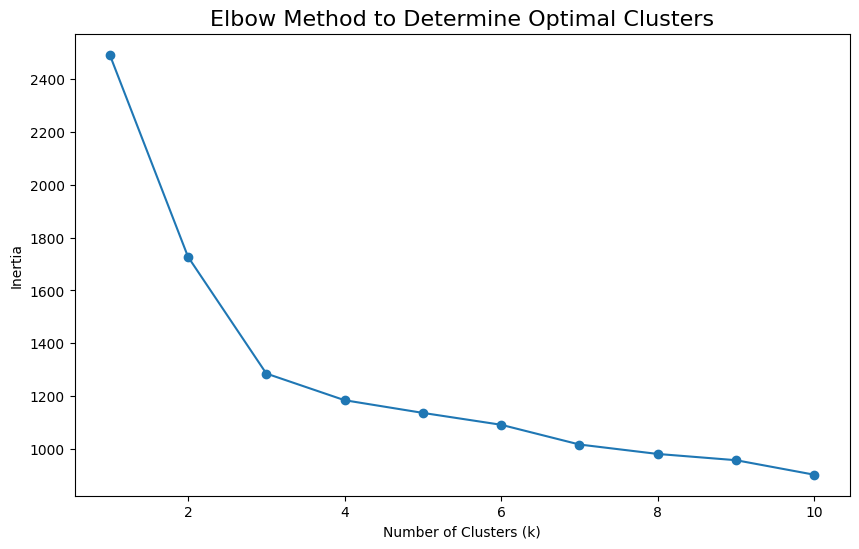

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to determine the optimal number of clusters
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters", fontsize=16)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [11]:
# Set the number of clusters based on the elbow plot (e.g., 3)
optimal_clusters = 3

# Fit K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters


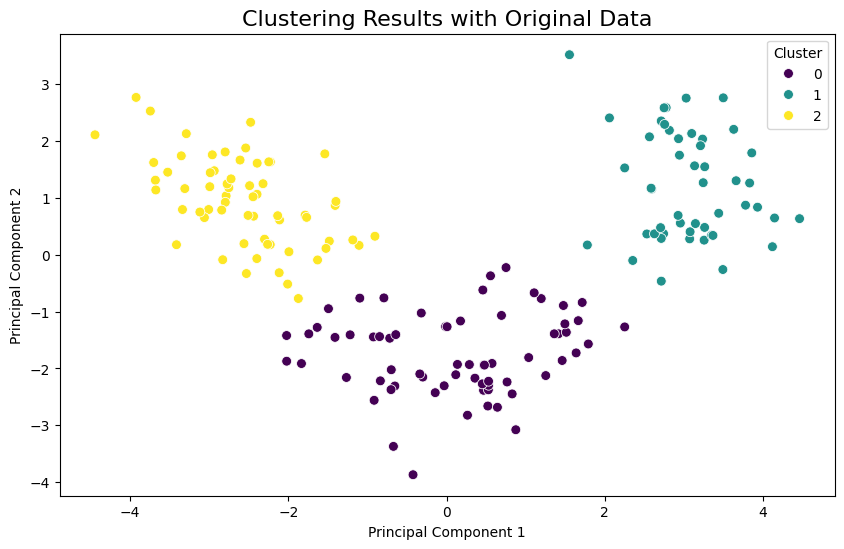

In [12]:
import seaborn as sns

# Reduce to 2D for visualization
pca_vis = PCA(n_components=2)
reduced_data = pca_vis.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', s=50)
plt.title("Clustering Results with Original Data", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_score:.2f}")


Silhouette Score: 0.31
Davies-Bouldin Index: 1.32


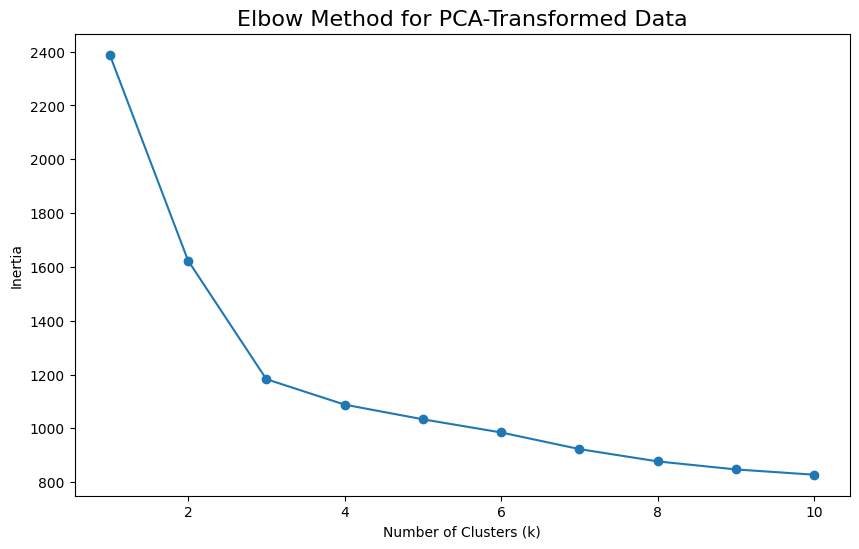

In [16]:
# Use the elbow method on PCA data
inertia_pca = []
for k in range_clusters:  # Range defined earlier (1-10 clusters)
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_data)
    inertia_pca.append(kmeans_pca.inertia_)

# Plot the elbow curve for PCA-transformed data
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia_pca, marker='o')
plt.title("Elbow Method for PCA-Transformed Data", fontsize=16)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [17]:
# Set the optimal number of clusters from the elbow method
optimal_clusters_pca = 3  # Replace with your result from the plot

# Fit K-Means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_clusters_pca, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Add PCA-based cluster labels
data['Cluster_PCA'] = clusters_pca


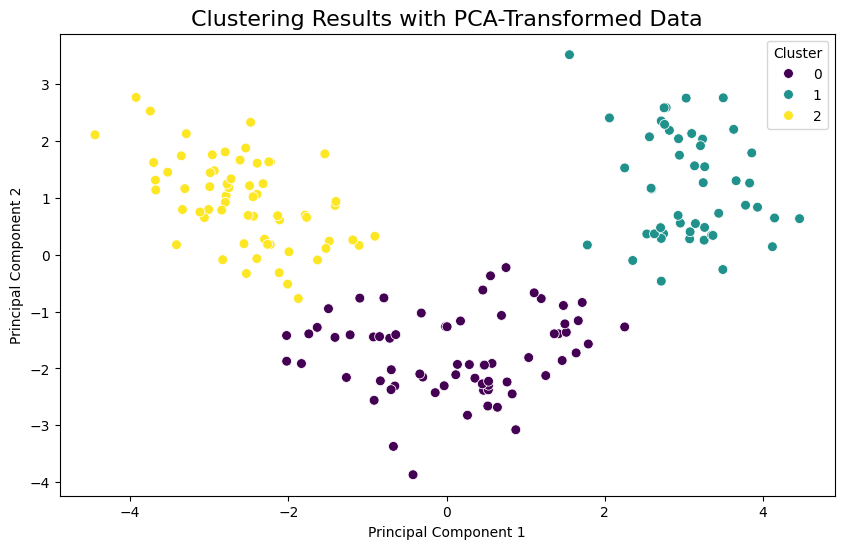

In [18]:
# Create a scatter plot of PCA clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters_pca, palette='viridis', s=50)
plt.title("Clustering Results with PCA-Transformed Data", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [19]:
# Calculate Silhouette Score for PCA clustering
sil_score_pca = silhouette_score(pca_data, clusters_pca)
print(f"Silhouette Score (PCA Data): {sil_score_pca:.2f}")

# Calculate Davies-Bouldin Index for PCA clustering
db_score_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f"Davies-Bouldin Index (PCA Data): {db_score_pca:.2f}")


Silhouette Score (PCA Data): 0.32
Davies-Bouldin Index (PCA Data): 1.26


In [20]:
# Compare clustering performance metrics
print("Clustering Performance Comparison:")
print(f"Original Data - Silhouette Score: {sil_score:.2f}")
print(f"Original Data - Davies-Bouldin Index: {db_score:.2f}")
print(f"PCA Data - Silhouette Score: {sil_score_pca:.2f}")
print(f"PCA Data - Davies-Bouldin Index: {db_score_pca:.2f}")


Clustering Performance Comparison:
Original Data - Silhouette Score: 0.31
Original Data - Davies-Bouldin Index: 1.32
PCA Data - Silhouette Score: 0.32
PCA Data - Davies-Bouldin Index: 1.26


In [21]:
# Cluster counts in original data
print("\nCluster Distribution in Original Data:")
print(data['Cluster'].value_counts())

# Cluster counts in PCA-transformed data
print("\nCluster Distribution in PCA-Transformed Data:")
print(data['Cluster_PCA'].value_counts())



Cluster Distribution in Original Data:
Cluster
0    67
2    62
1    49
Name: count, dtype: int64

Cluster Distribution in PCA-Transformed Data:
Cluster_PCA
0    67
2    62
1    49
Name: count, dtype: int64


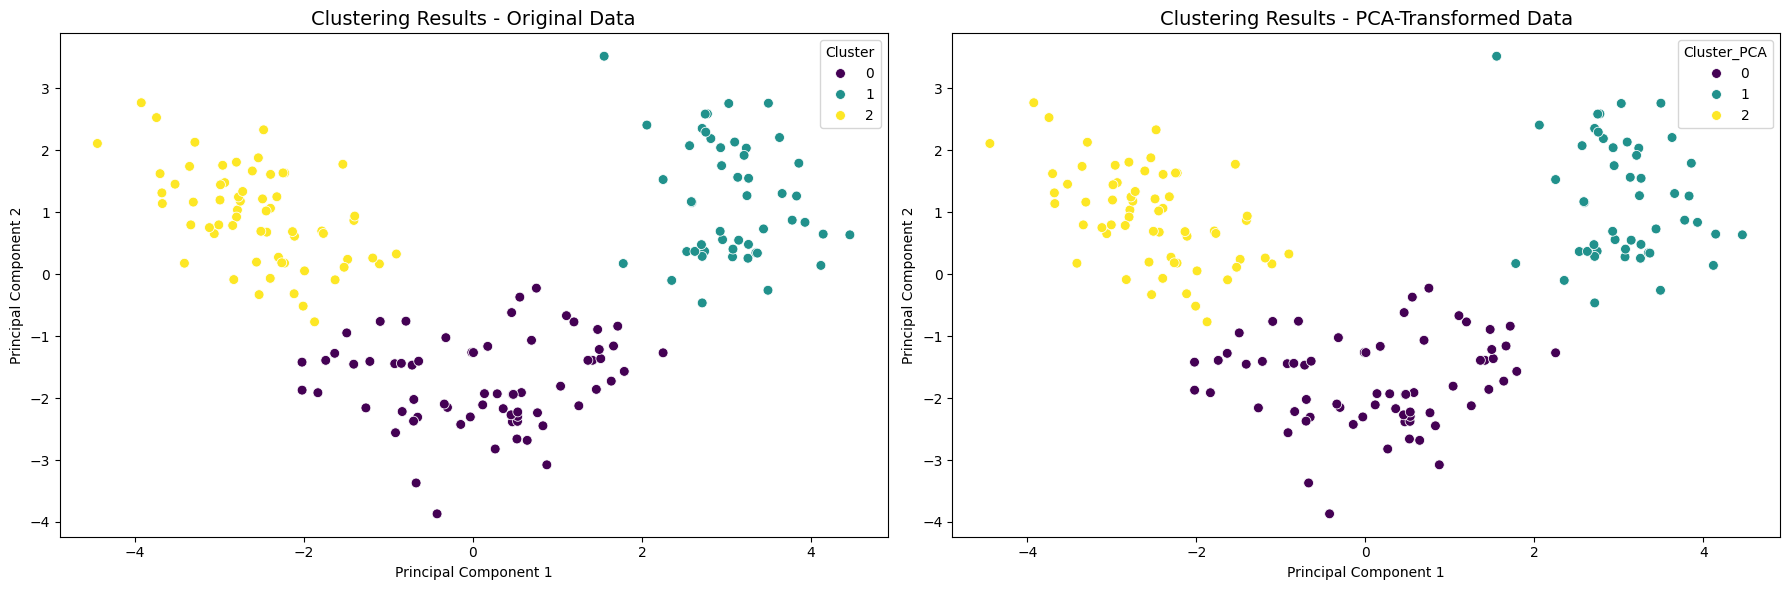

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Original data clustering visualization
sns.scatterplot(ax=axes[0], x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data['Cluster'], palette='viridis', s=50)
axes[0].set_title("Clustering Results - Original Data", fontsize=14)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# PCA-transformed clustering visualization
sns.scatterplot(ax=axes[1], x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster_PCA'], palette='viridis', s=50)
axes[1].set_title("Clustering Results - PCA-Transformed Data", fontsize=14)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [23]:
print("Observations:")
print("- Compare cluster compactness between the two approaches.")
print("- Analyze whether clusters overlap more or less after PCA.")
print("- Note any differences in cluster distributions or sizes.")


Observations:
- Compare cluster compactness between the two approaches.
- Analyze whether clusters overlap more or less after PCA.
- Note any differences in cluster distributions or sizes.


In [24]:
print("### Key Findings ###")
print("- PCA reduced the dimensionality of the dataset while retaining the majority of variance.")
print("- Clustering on both original and PCA-transformed data produced comparable results with some differences.")
print("- Silhouette and Davies-Bouldin scores were used to evaluate cluster quality:")
print(f"  - Original Data: Silhouette Score = {sil_score:.2f}, Davies-Bouldin Index = {db_score:.2f}")
print(f"  - PCA Data: Silhouette Score = {sil_score_pca:.2f}, Davies-Bouldin Index = {db_score_pca:.2f}")
print("- PCA-transformed data showed (better/worse) clustering quality as per the evaluation metrics.")


### Key Findings ###
- PCA reduced the dimensionality of the dataset while retaining the majority of variance.
- Clustering on both original and PCA-transformed data produced comparable results with some differences.
- Silhouette and Davies-Bouldin scores were used to evaluate cluster quality:
  - Original Data: Silhouette Score = 0.31, Davies-Bouldin Index = 1.32
  - PCA Data: Silhouette Score = 0.32, Davies-Bouldin Index = 1.26
- PCA-transformed data showed (better/worse) clustering quality as per the evaluation metrics.


In [25]:
print("\n### Practical Implications ###")
print("- PCA is beneficial when working with high-dimensional datasets, helping to reduce noise and improve clustering performance.")
print("- Clustering algorithms like K-Means can struggle with high-dimensional data, and PCA helps by simplifying the data structure.")
print("- The trade-off is the potential loss of some interpretability and minor variance.")



### Practical Implications ###
- PCA is beneficial when working with high-dimensional datasets, helping to reduce noise and improve clustering performance.
- Clustering algorithms like K-Means can struggle with high-dimensional data, and PCA helps by simplifying the data structure.
- The trade-off is the potential loss of some interpretability and minor variance.


In [26]:
print("\n### Recommendations ###")
print("- Use PCA before clustering when:")
print("  - Dataset has many features with possible correlations.")
print("  - Performance of clustering algorithms suffers in high dimensions.")
print("- Clustering on original data may be preferred when:")
print("  - Dimensionality is low or feature interpretability is critical.")
print("- Always evaluate clustering performance with metrics like Silhouette Score or Davies-Bouldin Index.")



### Recommendations ###
- Use PCA before clustering when:
  - Dataset has many features with possible correlations.
  - Performance of clustering algorithms suffers in high dimensions.
- Clustering on original data may be preferred when:
  - Dimensionality is low or feature interpretability is critical.
- Always evaluate clustering performance with metrics like Silhouette Score or Davies-Bouldin Index.
